# Cross Validation 

## 1. Introduction

In this exercise, we will dive into the whole machine learning development workflow. A common mistake (and we made it intentionnaly during the previous days) is to learn the parameters of a prediction function and testing it on the same data. What's wrong with that? We can’t fit the model to our training data and hope it would accurately work for the real data it has never seen before.

To avoid that to happen, there are several techniques: we could remove a part of the training data and using it to get predictions from the model trained on rest of the data (= __Holdout Method__). But, by reducing the training data, we risk losing patterns in data set and increase the error. __K-Fold cross validation__ will help us to solve this problem.

In K Fold cross validation, we  split our data into k separated "folds". Then, the Holdout Method is repeated k times, such as each time, one of the k folds will be the test subset and the (k-1) other folds will be used together as the training set.

__Note__ that this method does not depend on the model. In this example, we will use it on a Linear Regression but you could use it on any methods you want (KNN, Logistic Regression,...).

This following image schematize this algorithm.
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" style="width:50%;">

The general workflow to apply the Cross Validation is always the same:
1. Instanciate the model from scikit-learn you want to use (LinearRegression for the today exercise);
2. Instanciate the KFold class with the parameters you want;
3. Use the cross_val_score() function to measure the performance of your model.

## 2. Data exploration

In this section, we will analyse the sale price of houses in Iowa. We will try to predict the final sale price depending on different criterias. 

- read the data from the file "saleprice_housing.txt" (__do not forget__ to specify the delimiter as "\t" for tabulation)
- display the 5 first lines
- Generate 3 diagrams (scatter plot) : 
    1. The first one represents the "Garage Area" on the X-axis and the "SalePrice" on the Y-axis
    2. The second one represents the "Gr Liv Area" on the X-axis and the "SalePrice" on the Y-axis
    3. And the last one is the "Overall Cond" on the X-axis and the "SalePrice" on the Y-axis

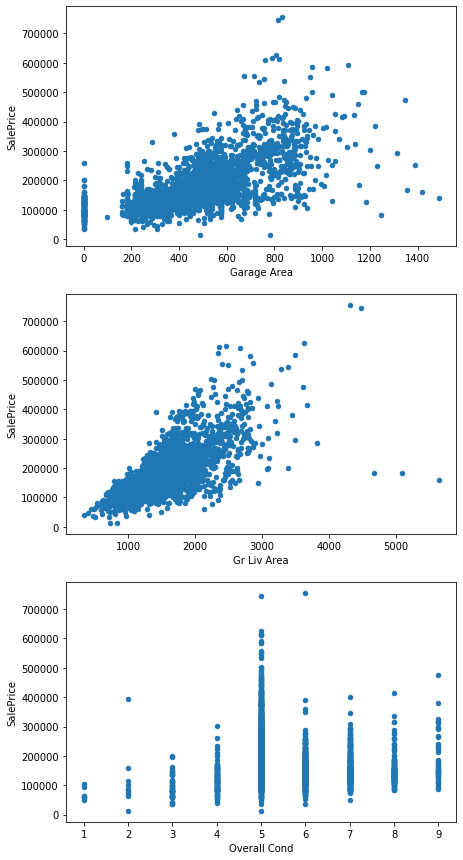

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("data/saleprice_housing.txt", delimiter="\t")
data.head()
target = "SalePrice"

fig = plt.figure(figsize=(7,15))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

data.plot(x = "Garage Area", y = "SalePrice", ax = ax1, kind ="scatter")
data.plot(x = "Gr Liv Area", y = "SalePrice", ax = ax2, kind ="scatter")
data.plot(x = "Overall Cond", y = "SalePrice", ax = ax3, kind ="scatter")
plt.show()

## 3. Linear Regression with Scikit-Learn

- Use the LinearRegression() model from Scikit Learn with the column "Gr Liv Area" for the training and "SalePrice" for the target.
- Plot the line on the corresponding graph.
- What would be the price for a house with "Gr Live Area" equal to 2000?

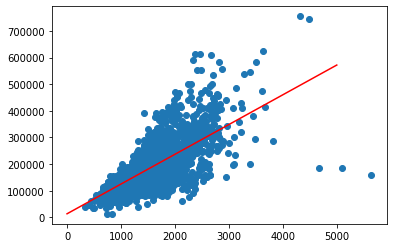

array([236677.63608036])

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data[["Gr Liv Area"]], data['SalePrice'])
# y = a1 * x + a0
a0 = lr.intercept_
a1 = lr.coef_
x = np.linspace(0, 5000, num=1000)
y = a1 * x + a0

plt.scatter(data["Gr Liv Area"], data["SalePrice"])
plt.plot(x, y, "red")
plt.show()

gr_live_area = 2000
price = a1 * gr_live_area + a0
price

## 4. Cross Validation with Scikit-Learn 

Well done, you made a prediction based on one feature. 

Now we will use a Cross Validation in order to measure the performance of your model.

- Create your K-Fold class [[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) with the following parameters: 
    - 5 folds;
    - shuffle = True;
    - random_state = 1 (so we get the same values);
    - assign this model to the variable `kf`.

In [4]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(5, shuffle = True, random_state = 1)

- Create a new instance of the class `LinearRegression` and assign it to the variable `lr`.

In [4]:
lr = LinearRegression()

- Use `cross_val_score()` [[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function to evaluate your K-folds: 
    - use the `LinearRegression` instance `lr` you just created;
    - use the K-fold `kf` you initiated above
    - use the column "Gr Liv Area" for the training and the column "SalePrice" for the target;
    - use the scoring parameter with the value "neg_mean_squared_error";
    - return an array with the MSE values (one for each fold);
    - assign the result to the variable `mses`.

In [5]:
mses = cross_val_score(lr, data[["Gr Liv Area"]], data['SalePrice'], scoring='neg_mean_squared_error', cv=kf)

- Compute the squared root of the absolute value of each mse and assign it to the variable `rmses`.
- Compute the mean of the RMSEs and assign it to the variable `avg_rmses`.
- Compute the standard deviation of the RMSEs and assign it to the variable `std_rmses`.
- Print your results (`avg_rmses` and `std_rmses`).

In [6]:
rmses = np.sqrt(np.absolute(mses))
avg_rmses = np.mean(rmses)
std_rmses = np.std(rmses)
print(avg_rmses)
print(std_rmses)

56455.51312272225
3859.1267403956235


## 5. Explore different values for K

Well done! You just calculated the mean of your Root Mean Squared Error (RMSE) and its standard deviation. But what does that mean? To answer this question, let's compare the `avg_rmses` and `std_rmses` for differentt values of K (number of folds).

- Using a For-Loop `for k in num_folds:`, compute the `avg_rmses` and `std_rmses` for each k in num_folds = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 100, 1000].
- For each iteration print the result with the following command : `print(str(k), "folds: ", "AVG RMSE: ", str(avg_rmses), "STD RMSE: ", str(std_rmses))`.
- __hint__: do no hesitate to copy paste from the previous exercise...

In [5]:
num_folds = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 100, 1000]

stock_avg_rmses = []
stock_std_rmses = []

for k in num_folds:
    kf = KFold(k, shuffle = True, random_state = 1)
    lr = LinearRegression()
    mses = cross_val_score(lr, data[["Gr Liv Area"]], data['SalePrice'], scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmses = np.mean(rmses)
    std_rmses = np.std(rmses)
    stock_std_rmses.append(std_rmses)
    stock_avg_rmses.append(avg_rmses)
    
    print(str(k), "folds: ", "AVG RMSE: ", str(avg_rmses), "STD RMSE: ", str(std_rmses))

3 folds:  AVG RMSE:  56578.1023858374 STD RMSE:  1235.2243419722163
5 folds:  AVG RMSE:  56455.51312272225 STD RMSE:  3859.1267403956235
7 folds:  AVG RMSE:  56471.188255283676 STD RMSE:  3545.7742827260527
9 folds:  AVG RMSE:  56489.11778531046 STD RMSE:  4015.368982993881
11 folds:  AVG RMSE:  56532.748971465626 STD RMSE:  3436.8536989743297
13 folds:  AVG RMSE:  56410.51278957704 STD RMSE:  4796.8759830064555
15 folds:  AVG RMSE:  56391.4640331041 STD RMSE:  4781.40662154845
17 folds:  AVG RMSE:  56416.47077399294 STD RMSE:  5107.606468007092
19 folds:  AVG RMSE:  56265.89624872458 STD RMSE:  6257.179625798848
21 folds:  AVG RMSE:  56301.82378643862 STD RMSE:  6066.29679337447
100 folds:  AVG RMSE:  55004.97517198328 STD RMSE:  13560.696165334684
1000 folds:  AVG RMSE:  46857.1051994757 STD RMSE:  31784.069807623397


It seems that as k become bigger, the average RMSE decrease but the standard deviation increase. In an ideal world, we would like to have an avg_rmses and a std_rmses as small as possible. So, we have to choose a k that offers a good compromise between a small `avg_rmse` and a `small std_rmse`.

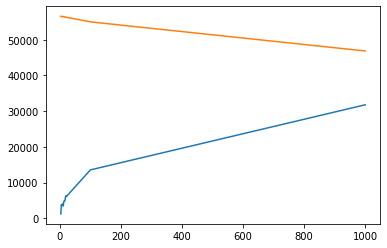

In [6]:
plt.plot(num_folds, stock_std_rmses)
plt.plot(num_folds, stock_avg_rmses)